# Exploratory Data Analysis

### 1. Select and Merge Interested Classes

Creating honda_civic_1998
Creating honda_accord_1997
Creating ford_f150_2006
Creating chevrolet_silverado_2004
Creating toyota_camry_2014
Creating nissan_altima_2014
Creating toyota_corolla_2013
Creating dodge_ram_2001
Creating gmc_sierra_2012
Creating chevrolet_impala_2008


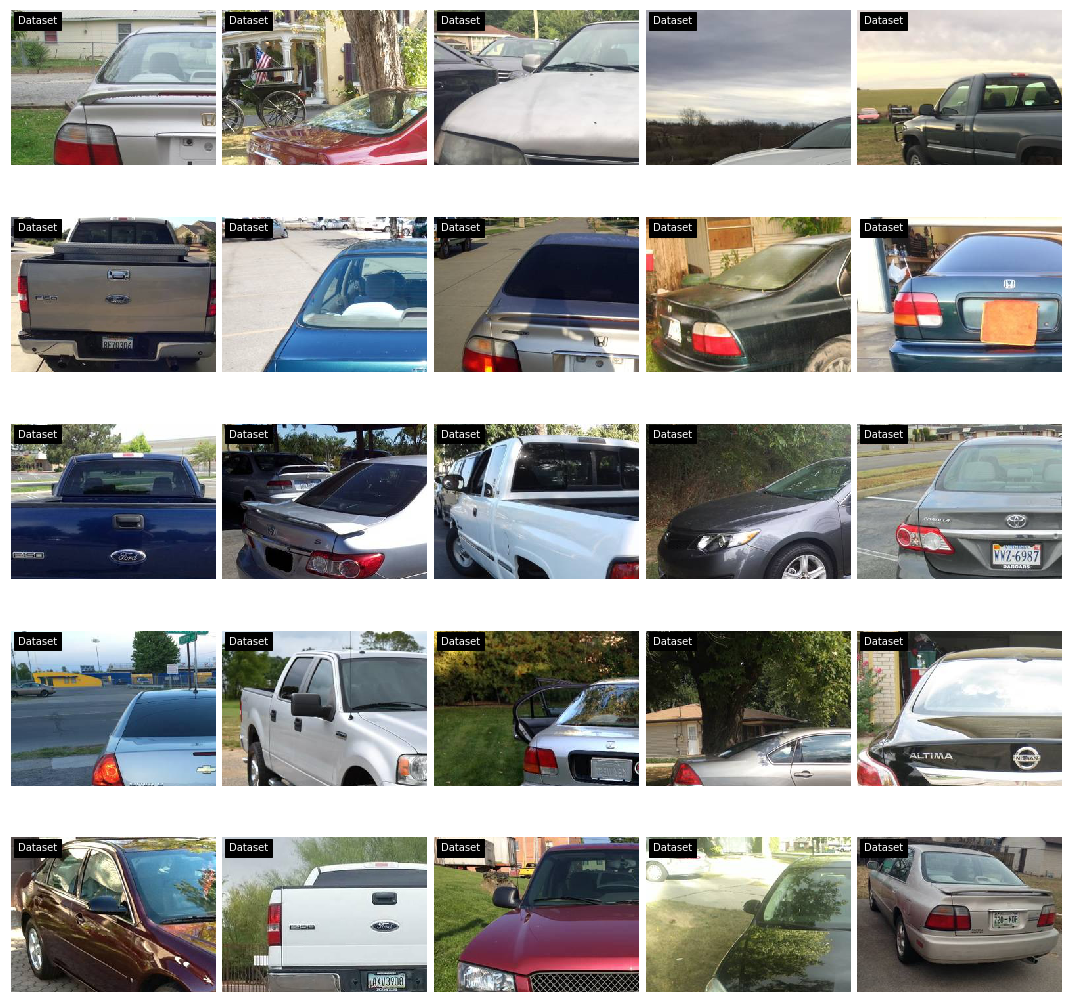

In [1]:
import os
import shutil
import glob
import vmmr_utils
import matplotlib.pyplot as plt
%matplotlib inline

cars = {
    "honda_civic_1998": ["honda_civic_1997", "honda_civic_1998"], # available "honda_civic_1999"
    "honda_accord_1997": ["honda_accord_1996", "honda_accord_1997"],
    "ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    "chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    "toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    "dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    "gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    "chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]
}


full_dataset_path = "../Dataset/SubsetVMMR"
stolen_cars_path = "../Dataset/Most_Stolen_Cars"

if os.path.exists(stolen_cars_path):
    shutil.rmtree(stolen_cars_path)
else:
    os.makedirs(stolen_cars_path)

for directory, car_list in cars.items():
    print("Creating", directory)
    car_directory_name = os.path.join(stolen_cars_path, directory)
    os.makedirs(car_directory_name)
    for car in car_list:
        path = os.path.join(full_dataset_path, car, "")
        files = glob.glob(path + '*.jpg')
        for file in files:
            shutil.copy(file, car_directory_name)

vmmr_utils.display_images(stolen_cars_path)

### 2 Removing Invalid, Corrupt and Non-JPG files

In [2]:
from multiprocessing import Pool

#Check Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(stolen_cars_path + "/*/*")
    pool.map(vmmr_utils.check_image, image_list)
    pool.close()

print('Done.')

Done.


### 2.3 Confirm Folder Structure is Correct

To summarize and confirm our progress, we can take a look at the folder tree structure in **Most_Stolen_Cars** to take a look at our images we used to create a smaller subset. 

Click the cell below and then click **Run**.

### 3. Create Test, Train and Validation Dataset

### Create Train, Validation and Test Folders

![Create Data Folders](assets/EDA_1-4.png)

We need to create training, validation and test folders for data ingestion and we'll use 0.7, 0.1, 0.2 ratio for this purpose.

Click the cell below and then click **Run**.

### 4. Augmentation

### Sample Augmentation

While looking at our distribution above we saw that certain classes were significantly lower than others.  To help mitigate that issue we're going to augment some of our data set so that we have a dataset that is more closely distributed.  Below we're taking a look at an example image and showing the effets of augmentation given a certain threshold of modification.  Then we're going to apply these random augmentations to our data.

Click the cell below and then click **Run**.

### Finalize Augmented Dataset for Training 

![Data Augmentation](assets/EDA_1-5.png)

By using the augmentation techniques we have learned, we can oversample minority classes in training set. We are not going to do these steps in validation or test in order not to create any bias on the data. 

**Activity**

Click the cell below and then click **Run**.

### 5. Resizing Images

### Resize Images

![Resize Images](assets/EDA_1-6.png)

Depending on the toplogy, we need to resize the images with the expected image format. Since we're going to be using InceptionV3 in the next section we're going to match the size, 299x299, for that topology. 

**Activity**

Click the cell below and then click **Run**.

## Summary 
**In this section of the training you learned**
- Fetch and visually inspect a dataset 
- Create a dataset to address a real life problem
- Image Preprocessing and Data Augmentation Techniques
- Address Imbalanced Dataset Problem
- Organize a dataset into training, validation and testing groups
- Finalize an augmented dataset for training, and testing

You now should understand ways to find a data set and to prepare a data set for machine learning and training.

## Citations

A Large and Diverse Dataset for Improved Vehicle Make and Model Recognition
F. Tafazzoli, K. Nishiyama and H. Frigui
In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops 2017. 
